In [67]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions.multi_gradient_descent import *

In [68]:
def feature_scaling(data):
    if len(data.shape) >1:
        k = np.zeros(data.shape[1])
        # for r in range(data.shape[0]):
        for c in range(data.shape[1]):
            k[c] = np.sum(data[:,c])
        k = k/data.shape[0]
        for c in range(data.shape[1]):
            f = np.max(data[:,c]) - np.min(data[:,c])
            data[:,c] -= k[c]
            data[:,c] /= f
        return data
    else:
        return (data-(np.sum(data)/data.shape[0]))/(np.max(data) - np.min(data))


In [69]:
file = "./data from book/advertising.csv"
data = pd.read_csv(file)
print(data.head())
x_data = np.array([[x,x**2] for x in data['TV']])
x_test = x_data[150:]
x_data = x_data[0:150]

y_data = np.array(data['sales'])
y_test = y_data[150:]
y_data = y_data[0:150]


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [70]:
# # fetaure scaling
# x_data = feature_scaling(x_data)
# y_data = feature_scaling(y_data)

In [71]:
w = np.zeros(x_data.shape[1])
b=0.1
per_w,per_b = gradient_descent(x_data,y_data,w,b,0.000000001,50000)
print(per_w, per_b)

[2.37689027e-06 4.92624934e-04] 0.10000001405066668 -------------------------------- j:  42.27377978551079 dj_dw:  [  -2376.89026667 -492624.93392   ] dj_db:  -14.050666666666661
[4.32908058e-06 3.46518988e-04] 0.10000005486156692 -------------------------------- j:  27.09527627853082 dj_dw:  [-258.43073392  -86.49744593] dj_db:  -4.3699293489999835
[6.90948478e-06 3.46481906e-04] 0.10000009854279994 -------------------------------- j:  27.09460968967629 dj_dw:  [-258.04975386    1.09440253] dj_db:  -4.368147601454102
[9.48995831e-06 3.46470802e-04] 0.10000014222394193 -------------------------------- j:  27.093943602722202 dj_dw:  [-258.04544795    1.10996143] dj_db:  -4.368087137385452
[1.20703895e-05 3.46459703e-04] 0.10000018590448244 -------------------------------- j:  27.093277537650245 dj_dw:  [-258.04120908    1.10994597] dj_db:  -4.36802698041374
[1.46507783e-05 3.46448603e-04] 0.10000022958442138 -------------------------------- j:  27.09261149445967 dj_dw:  [-258.0369703   

In [72]:
# t = np.arange(0,150,1)
# t = np.array([[x,x**2] for x in t])
# pred = predict_graph(t,per_w,per_b)
pred = predict_graph(x_data,per_w,per_b)
pred

array([18.47581142,  1.23216336,  0.40004425,  8.70721671, 11.92513359,
        0.2301871 ,  1.78202973,  5.82582504,  0.22844095, 14.2809275 ,
        2.20025646, 16.27647541,  0.56115587,  4.09555758, 14.8434588 ,
       13.71653862,  2.28806351, 26.80549274,  2.36164778,  8.28720173,
       16.79219371, 19.56694368,  0.31483347, 18.21156809,  2.01011022,
       23.62368425,  7.85828157, 19.97843015, 21.33341279,  2.43638148,
       28.88453539,  5.23643136,  4.07471384, 24.07554744,  3.97128686,
       28.48080617, 24.29463595,  2.66185664,  1.17885834, 18.16771226,
       14.63287811, 11.47937959, 29.01358994, 15.21558752,  0.59590137,
       11.25967819,  3.57077393, 19.94780306, 18.05102143,  2.2413663 ,
       14.2809275 ,  4.29976814, 16.51243011, 12.1392359 , 23.59038298,
       14.16456067,  0.20627469,  7.22696008, 15.74157155, 15.72797336,
        1.60228407, 23.35793085, 19.85606254,  4.46523518,  6.76404806,
        2.35106537,  0.78140613,  7.51579169, 19.56694368, 16.56

[0.01238874 0.00029322] 0.10021110


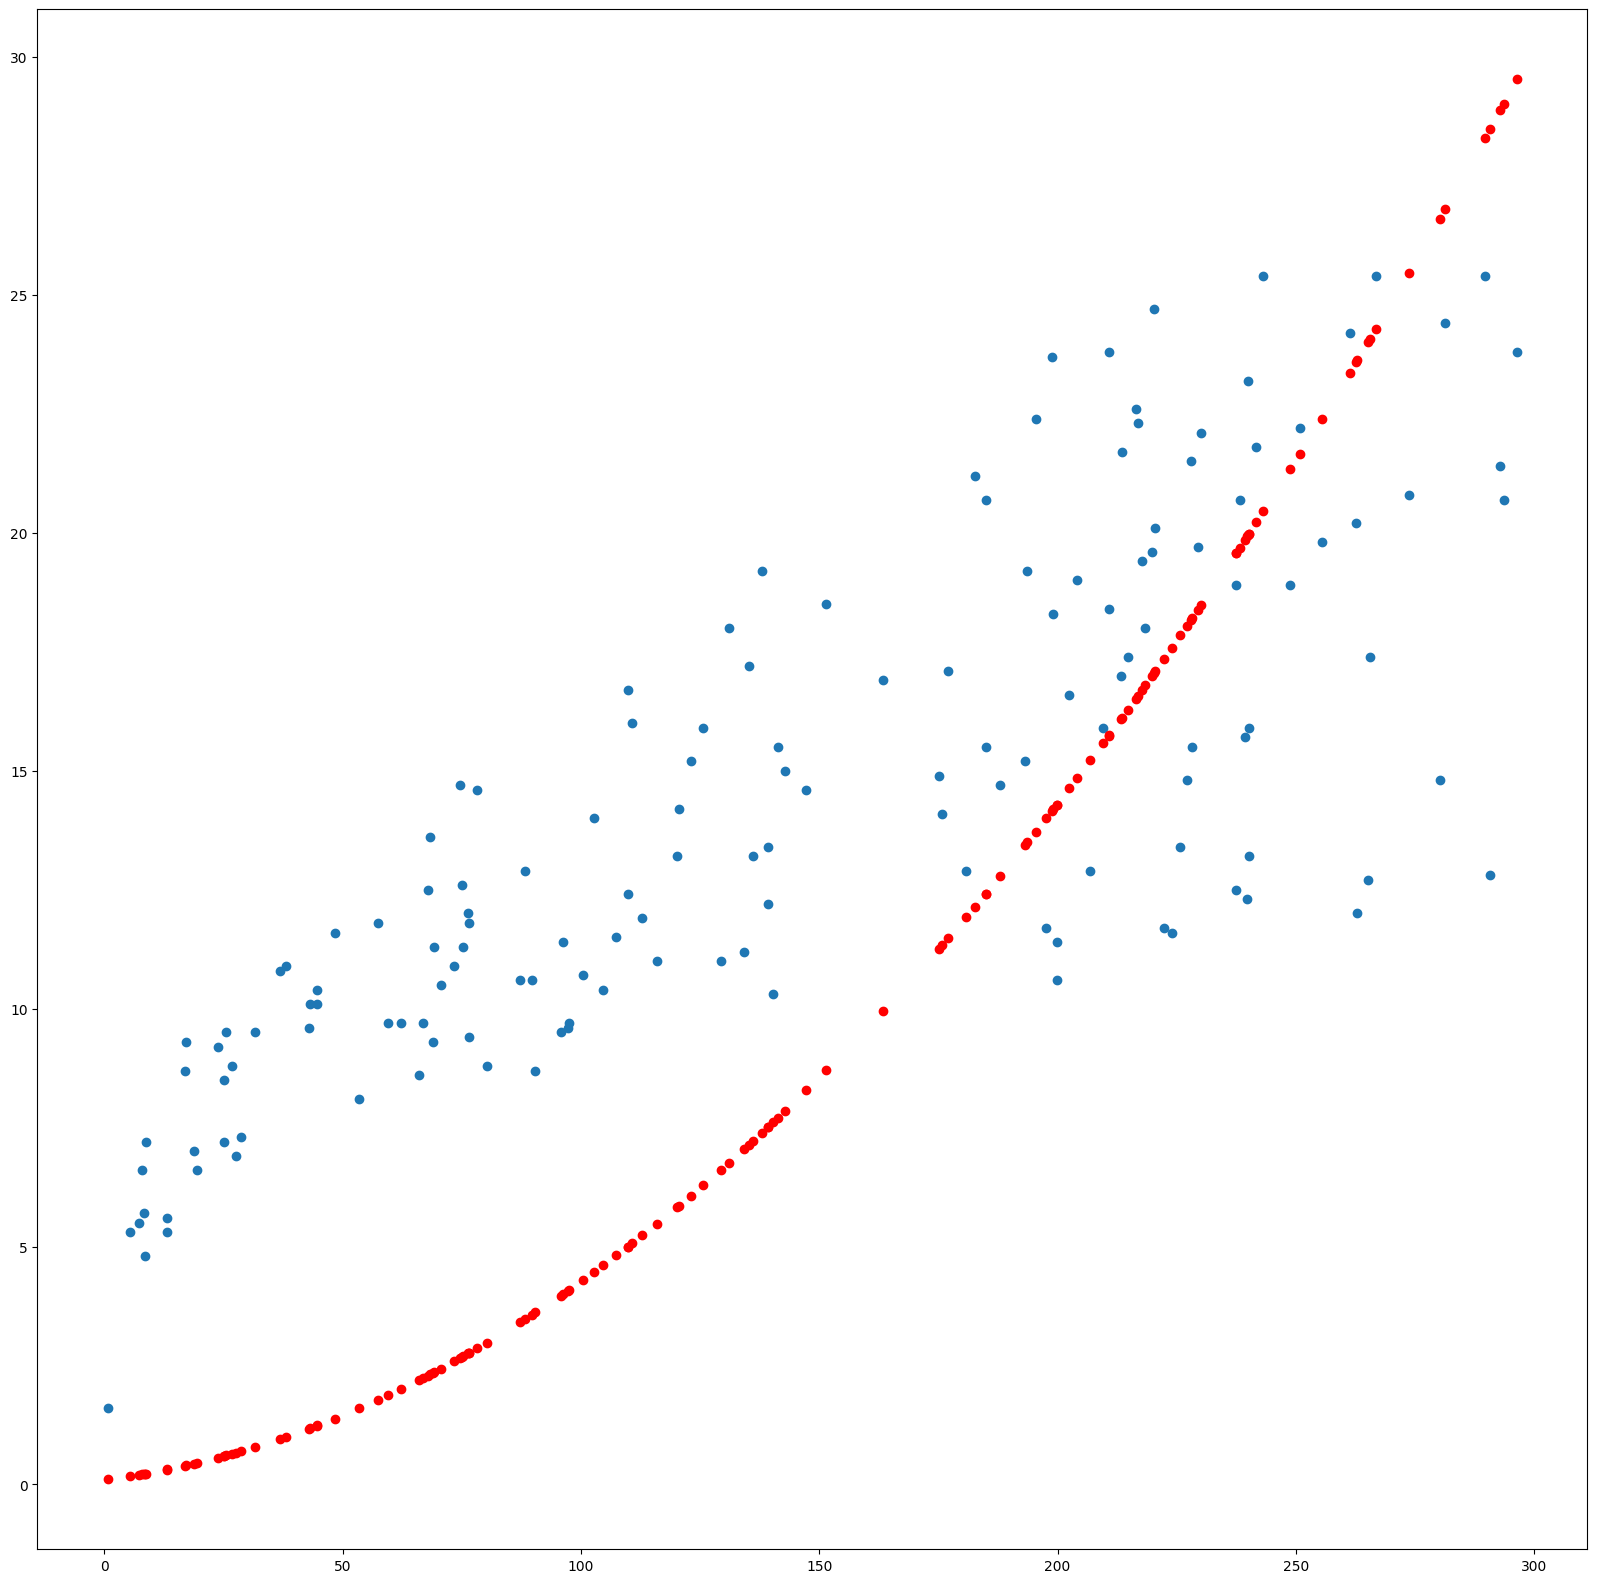

In [73]:
print(per_w,'%.08f' %per_b)
pl.figure(figsize=[20,20])
pl.scatter(x_data[:,0],y_data)
pl.scatter(x_data[:,0],pred,color= "red")
pl.show()

In [74]:
print(accuracy(x_test, y_test,per_w,per_b))

47.900465227447754


In [75]:
# 47 percent error 
# feature scalling 98 percent error